# Bank Dataset Project 2  by David Smolinski
What this adds to my portfolio:
- data visualization
- pandas dataframe optimization

Links:
- [my portfolio](https://github.com/DavidSmolinski/portfolio)
- [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)
- [the csv](https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip)

In [3]:
%matplotlib inline
from io import BytesIO
from zipfile import ZipFile
import pandas as pd
import requests
from matplotlib import pyplot as plt

In [6]:
# get the csv in the zipped folder at the url
zip_folder_url="https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip"
response = requests.get(zip_folder_url)
with ZipFile(BytesIO(response.content)) as z:
    with z.open('bank.csv') as csv:
        df = pd.read_csv(csv, delimiter=';')
        print('''\nI'm changing column data types to make the dataframe (df) small and fast.\n\nold df properties:\n''')
        df.info(memory_usage='deep')
        old_df_size = df.memory_usage(deep=True).sum()
        df = pd.read_csv('bank.csv', delimiter=';',
                 dtype={'job': 'category', 'marital': 'category',
                        'month': 'category', 'contact': 'category', 'poutcome': 'category'})
df.education = pd.Categorical(df.education, categories=["primary", "secondary", "tertiary", "unknown"], ordered=True)
for e in ('default', 'housing', 'loan', 'y'):
    df[e] = df[e].str.contains('yes').astype(int)

print('\nnew df:\n')
df.info(memory_usage='deep')
new_df_size = df.memory_usage(deep=True).sum()
print(f'\nmemory saved: {old_df_size - new_df_size:,} B\n')


I'm changing column data types to make the dataframe (df) small and fast.

old df properties:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 2.9 MB

new df:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null

In [ ]:
print(df.head(2))

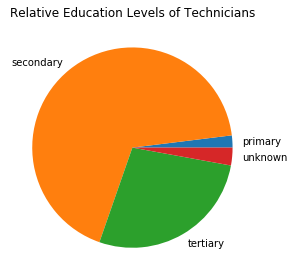

In [7]:
df[df.job=='technician'].groupby('education').education.count().plot(kind='pie')
plt.title('Relative Education Levels of Technicians')
plt.ylabel('')
plt.tight_layout()
# plt.savefig('ed of tech.png')
plt.show()

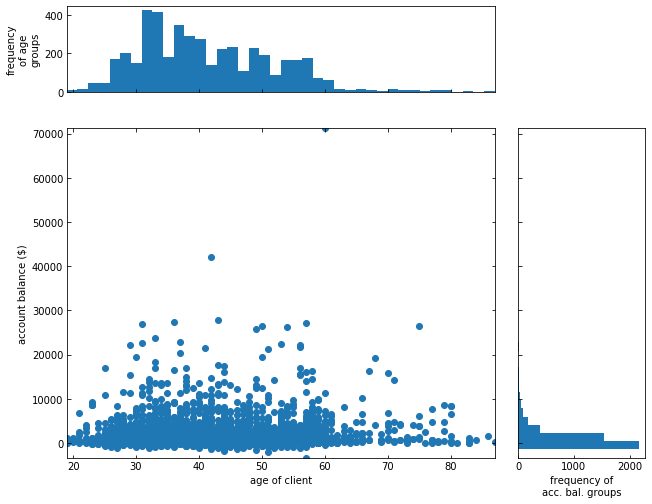

In [9]:
# make subplot axes
ax_scatter = plt.subplot2grid(shape=(4, 4), loc=(1, 0), rowspan=3, colspan=3)  # scatter plot
ax_histx = plt.subplot2grid(shape=(4, 4), loc=(0, 0), rowspan=1, colspan=3)  # histogram for x axis
ax_histy = plt.subplot2grid(shape=(4, 4), loc=(1, 3), rowspan=3, colspan=1)  # histogram for y axis

ax_scatter.tick_params(direction='in', top=True, right=True)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy.tick_params(direction='in', labelleft=False)

# make plots
ax_scatter.scatter(df.age, df.balance)
ax_histx.hist(df.age, bins=40)
ax_histy.hist(df.balance, bins=40, orientation='horizontal')

age_min, age_max = df.age.min(), df.age.max()
ax_scatter.set_xlim((age_min, age_max))
ax_scatter.set_ylim((df.balance.min(), df.balance.max()))
ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())

ax_scatter.set_xlabel('age of client')
ax_scatter.set_ylabel(r'account balance ($)')
ax_histx.set_ylabel('frequency\nof age\ngroups')
ax_histy.set_xlabel('frequency of\nacc. bal. groups')

plt.tight_layout()
fig = plt.gcf()
fig.set_size_inches(10, 8)
# plt.savefig('age bal.png')
plt.show()

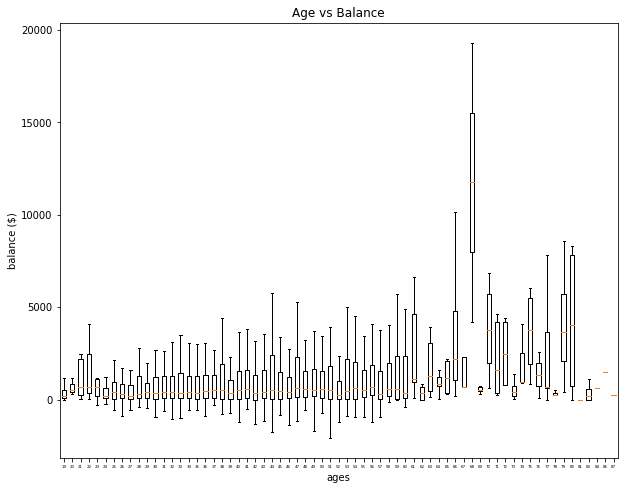

In [11]:
# Age vs Balance box plot without outliers
balance_series_list = []
age_labels = []

for age in range(age_min, age_max + 1):
    balance_ser = df.loc[df.age == age, 'balance']
    if not balance_ser.empty:
        balance_series_list += [balance_ser]
        age_labels += [age]

fig1, ax1 = plt.subplots()
ax1.boxplot(balance_series_list, showfliers=False)
ax1.set_xticklabels(labels=age_labels, fontsize=4)
ax1.set_xlabel('ages')
ax1.set_ylabel('balance ($)')
ax1.set_title('Age vs Balance')
fig = plt.gcf()
fig.set_size_inches(10, 8)
# fig1.savefig('age bal box.png', dpi=300)
plt.show()

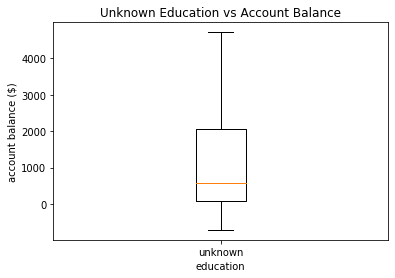

In [12]:
balance_ser2 = df.loc[df.education == 'unknown', 'balance']
fig2, ax2 = plt.subplots()
ax2.boxplot([balance_ser2], showfliers=False)
ax2.set_xticklabels(labels=['unknown'])
ax2.set_xlabel('education')
ax2.set_ylabel('account balance ($)')
ax2.set_title('Unknown Education vs Account Balance')
# fig2.savefig('unk ed bal.png')
plt.show()

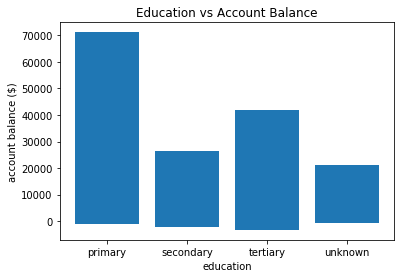

In [14]:
fig3, ax3 = plt.subplots()
ax3.bar(df.education, df.balance)
ax3.set_xlabel('education')
ax3.set_ylabel('account balance ($)')
ax3.set_title('Education vs Account Balance')
# fig3.savefig('ed bal.png')
plt.show()

dataset citations:

[Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

  Available at: [pdf] http://hdl.handle.net/1822/14838
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-1.txt